# Visualização do Grupo 1
___ 
O grupo 1 consiste das estações bhz, 30, 25 e sj2 localizadas em Belo Horizonte, Inconfidentes, Pirassinunga e São José dos Campos. As visualizações consistem de gráficos das séries temporais de cada estação, da diferença da série temporal de estações vizinhas, no caso os pares $(bhz, 30)$, $(30, 25)$, $(25, sj2)$ e também foi adicionado o par de estações mais distantes $(bhz, sj2)$.

Além disso, a execução do DTW para a comparação das séries temporais entre Belo Horizonte e São José dos Campos.

In [1]:
import os
import plotly
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.graph_objs as go
import plotly.plotly as py
import cufflinks as cf

from datetime import datetime
from functools import reduce
from plotly import tools
from scipy import signal
from dtw import dtw

import utils
from utils import local_data
from utils import group_1

plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




In [2]:
df_list = group_1

### Carregamento da série temporal de VTEC

In [3]:
df_series_tec = pd.read_pickle(os.path.join(local_data, "station_data_series_tec.pkl.xz"), compression='xz')
df_series_tec_first = pd.read_pickle(os.path.join(local_data, "station_data_series_tec_first_derivative.pkl.xz"), compression='xz')
df_series_tec_second = pd.read_pickle(os.path.join(local_data, "station_data_series_tec_first_derivative.pkl.xz"), compression='xz')

### Seleção do VTEC para o grup_1

In [4]:
df_series_tec = df_series_tec[df_list]
df_series_tec_first = df_series_tec_first[df_list]
df_series_tec_second = df_series_tec_second[df_list]

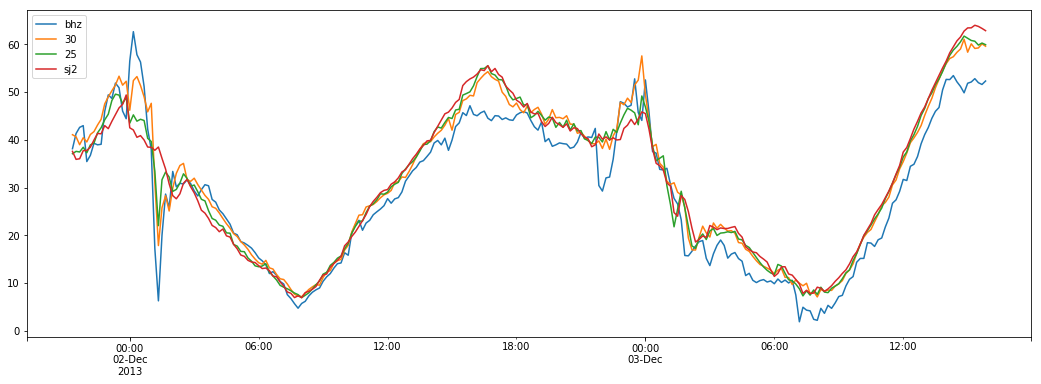

In [5]:
df_series_tec[128:384].plot(figsize=(18, 6))

### Geração dos dados de S4 para o grup_1

In [6]:
def df_s4_list(): 
    for i in df_list:
        df_s4 = pd.read_pickle('/home/peregrinus/dscience/data_s4_pre/pre_df_%s.pkl' %i).rolling(3, win_type='gaussian', center=True).mean(std=1.0)
        yield df_s4.rename(index=str, columns={"s4": "s4_" + i})
    
df_s4 = reduce(lambda left, right: pd.merge(left, right, how='inner', left_index=True, right_index=True), df_s4_list())
df_s4.reset_index(inplace=True)
df_s4['eventdate'] = pd.to_datetime(df_s4['eventdate'], utc=True)
df_s4.index = df_s4['eventdate']
del df_s4['eventdate']

### Geração do dataframe final para o grup_1

In [7]:
df_final = pd.merge(df_series_tec, df_s4, how='inner', left_index=True, right_index=True)
df_final.reset_index(inplace=True)
df_final['index'] = pd.to_datetime(df_final['index'], utc=True)
df_final.index = df_final['index']
del df_final['index']

### Belo Horizonte

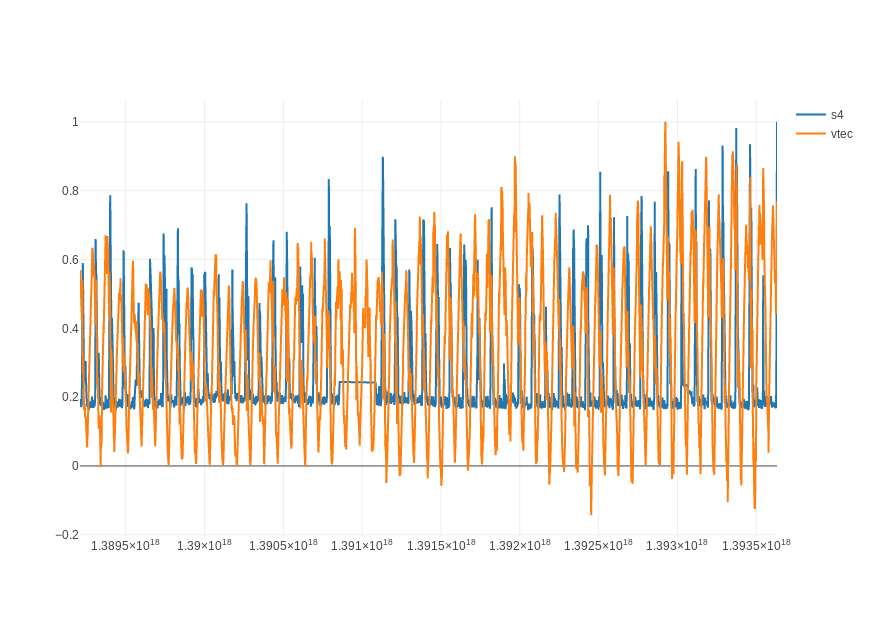

In [8]:
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_bhz']/df_final['s4_bhz'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=df_final['bhz']/df_final['bhz'].max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### Inconfidentes

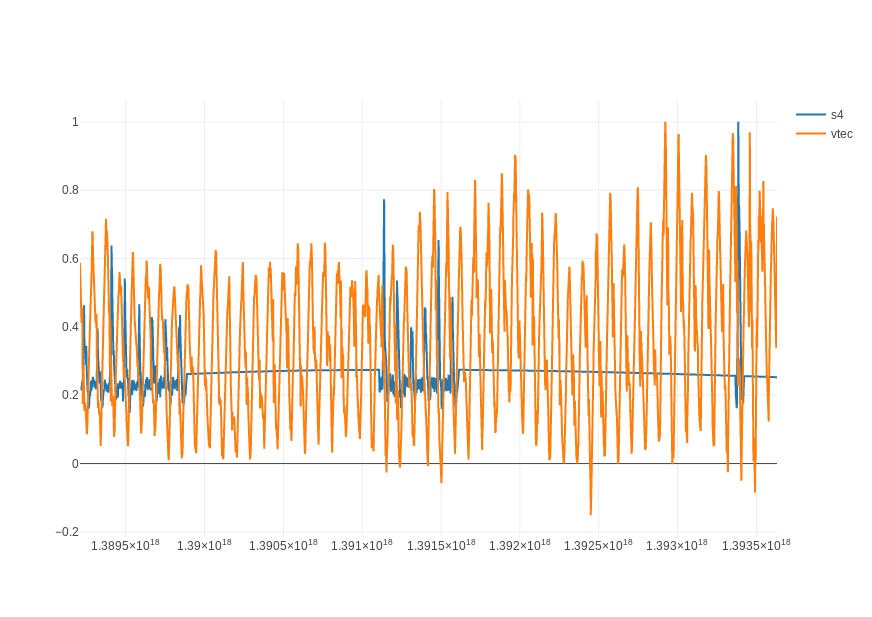

In [9]:
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_30']/df_final['s4_30'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=df_final['30']/df_final['30'].max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### Pirassinunga

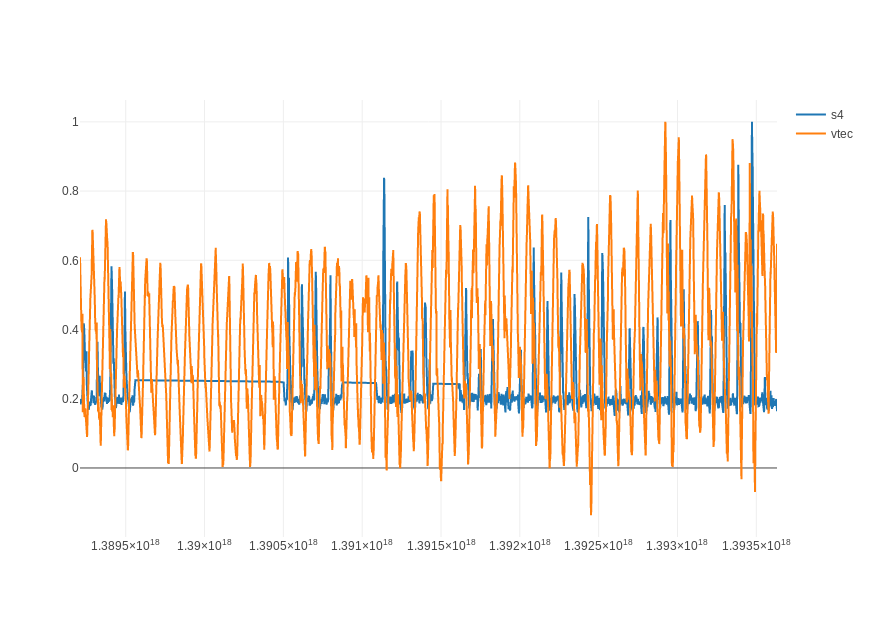

In [10]:
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_25']/df_final['s4_25'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=df_final['25']/df_final['25'].max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### São José dos Campos

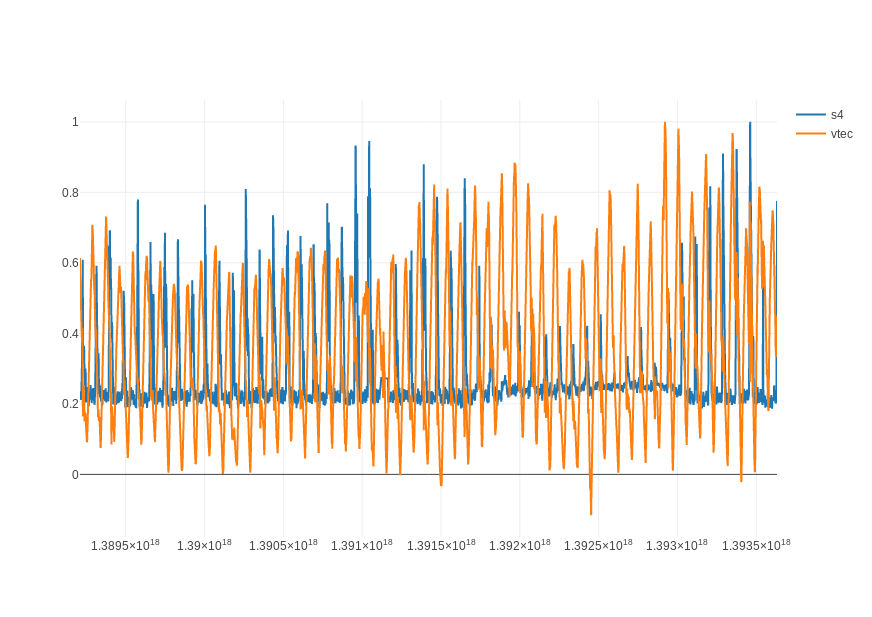

In [11]:
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_sj2']/df_final['s4_sj2'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=df_final['sj2']/df_final['sj2'].max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

In [12]:
corr = signal.correlate(df_final['sj2']/df_final['sj2'].max(), df_final['s4_sj2']/df_final['s4_sj2'].max(), mode='full')

#fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
#ax_orig.plot(sig)
#ax_orig.plot(clock, sig[clock], 'ro')
#ax_orig.set_title('Original signal')

corr

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/scipy/signal/signaltools.py:491: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



array([0.47606291, 0.85638115, 1.11884804, ..., 0.30149126, 0.20079776,
       0.10217077])

### Gradiente Belo Horizonte - Inconfidentes

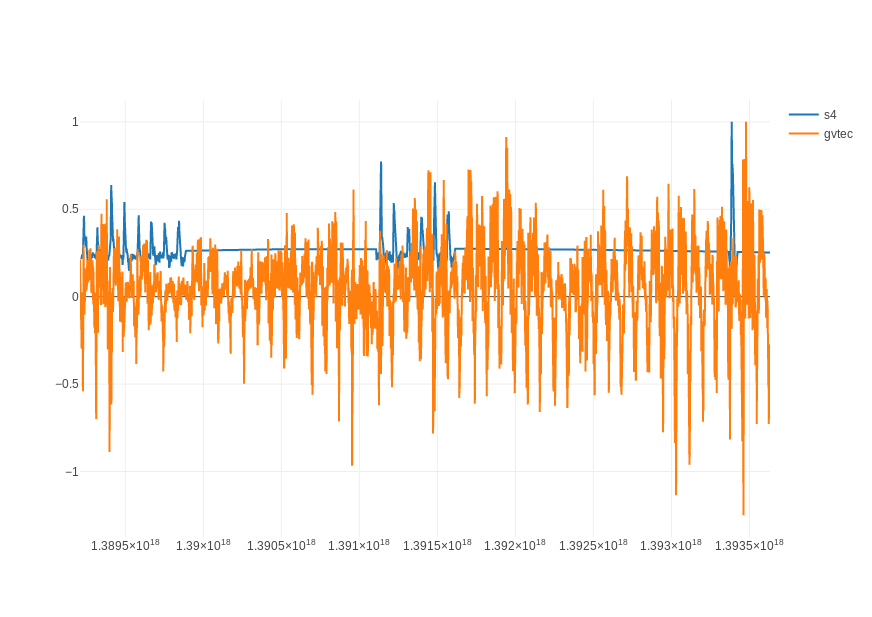

In [13]:
aux = df_final['30']-df_final['bhz']
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_30']/df_final['s4_30'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=aux/aux.max(), name='gvtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### Gradiente Inconfidentes - Pirassinunga

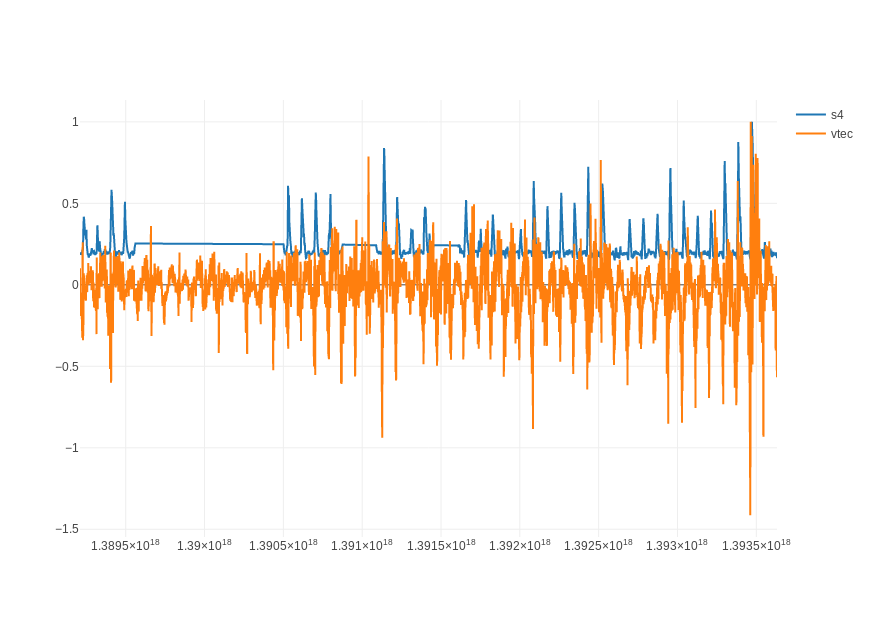

In [14]:
aux = df_final['25']-df_final['30']
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_25']/df_final['s4_25'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=aux/aux.max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### Gradiente Pirassinunga - São José dos Campos

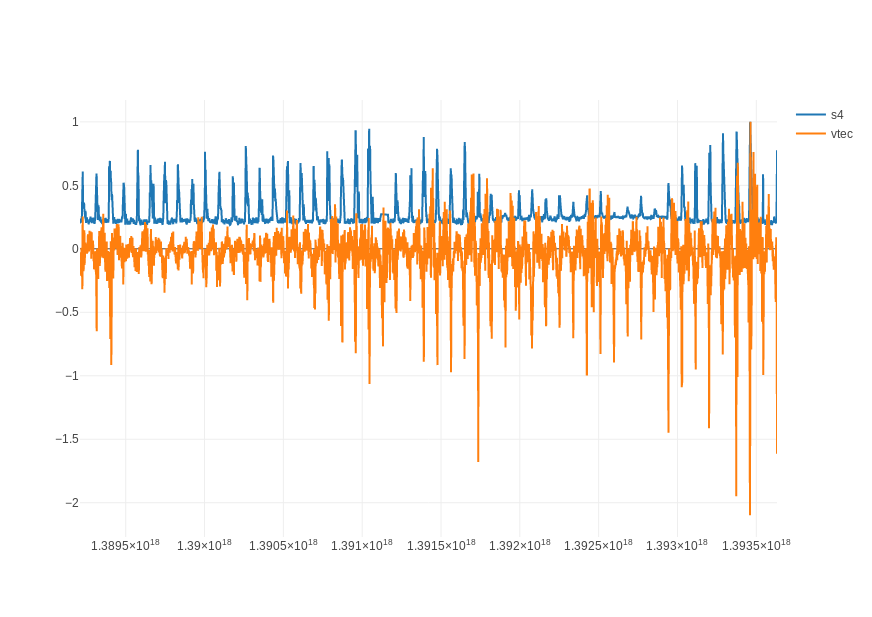

In [15]:
aux = df_final['sj2']-df_final['25']
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_sj2']/df_final['s4_sj2'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=aux/aux.max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

### Gradiente Belo Horizonte - São José dos Campos

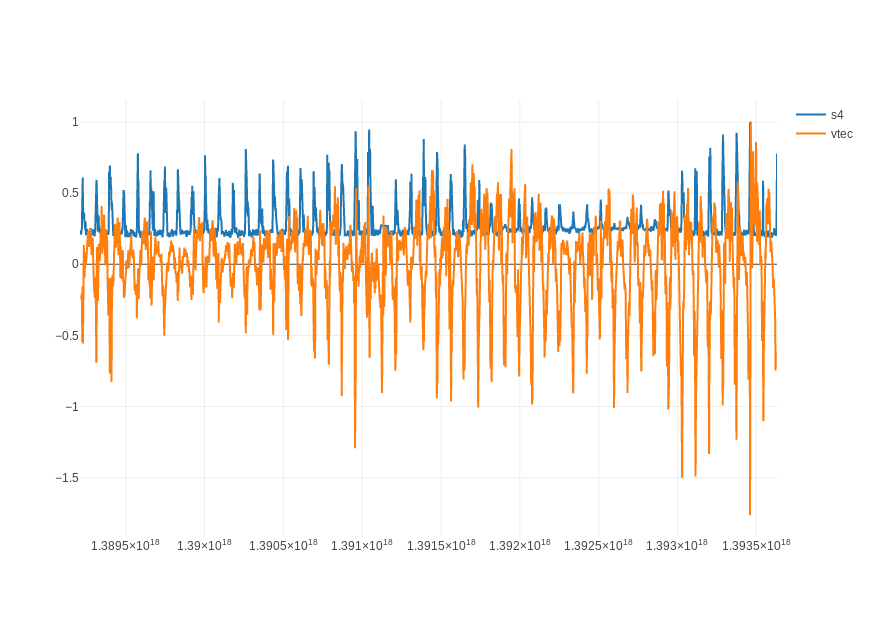

In [16]:
aux = (df_final['sj2']-df_final['bhz']).rolling(25, win_type='gaussian', center=True).mean(std=1.0)
data = [go.Scatter(x=df_final.index.values, y=df_final['s4_sj2']/df_final['s4_sj2'].max(), name='s4'), 
        go.Scatter(x=df_final.index.values, y=aux/aux.max(), name='vtec')]

layout = go.Layout(
    autosize=False,
    width=3600,
    height=600,
)


fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

In [17]:
dist, cost, acc, path = dtw(df_final['sj2'].values.reshape(-1,1), df_final['bhz'].values.reshape(-1,1), dist=lambda x, y: np.linalg.norm(x - y, ord=1))

In [18]:
print('Minimum distance found:', dist)

Minimum distance found: 1.0675014246947092


Populating the interactive namespace from numpy and matplotlib


/var/lib/jupyterhub/anaconda/envs/dscience/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['dist', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy



(-0.5, 7369.5)

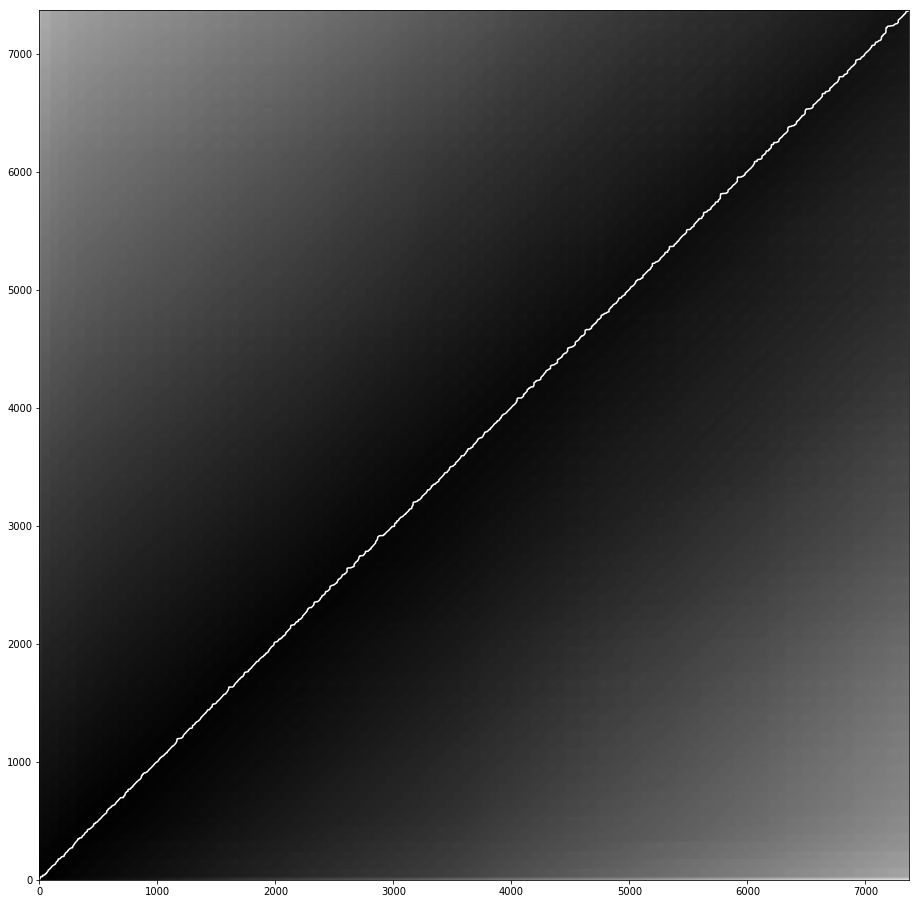

In [19]:
%pylab inline
fix, ax = plt.subplots(figsize=(16, 16))
ax.imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))